Шаг 1: Извлечение признаков с помощью VGG16

Установка необходимых библиотек

In [37]:
pip install geopandas rasterio



     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 

In [16]:
!pip install opencv-python-headless opencv-contrib-python


   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB 262.6 kB/s eta 0:02:54
   ---------------------------------------- 0.1/45.5 MB 469.7 kB/s eta 0:01:37
   ---------------------------------------- 0.1/45.5 MB 595.3 kB/s eta 0:01:17
   ---------------------------------------- 0.3/45.5 MB 1.1 MB/s eta 0:00:41
   ---------------------------------------- 0.4/45.5 MB 1.4 MB/s eta 0:00:32
   ---------------------------------------- 0.5/45.5 MB 1.7 MB/s eta 0:00:28
    --------------------------------------- 0.6/45.5 MB 1.8 MB/s eta 0:00:26
    --------------------------------------- 0.7/45.5 MB 1.9 MB/s eta 0:00:24
    --------------------------------------- 0.9/45.5 MB 2.0 MB/s eta 0:00:23
    --------------------------------------- 1.1/45.5 MB 2.2 MB/s eta 0:00:21
   - -------------------------------------- 1.2/45.5 MB 2.3 MB/s eta 0:00:20
   - --

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\eddyd\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
!pip install scikit-learn


In [1]:
!pip install tensorflow opencv-python-headless numpy


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 466.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     --------------------------------- ---- 41.0/46.2 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 330.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.9 MB 3.4 MB/s eta 0:01:51
   ---------------------------------------- 0.2/376.9 MB 1.9 MB/s eta 0:03:24
   ---------------------------------------- 0.3/376.9 MB 1.8 MB/s eta 0:03:26
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


Импорт необходимых библиотек

In [5]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
import os
import numpy as np
from scipy.ndimage import generic_filter

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter


In [21]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt

import json

Загрузка предобученной модели VGG16  

Создадим модель на основе VGG16 без последнего слоя, чтобы использовать её для извлечения признаков:

In [9]:
# Загрузка предобученной модели VGG16
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


# Константы

In [12]:
# Название папки с изображениями - кропами
crops_folder = '1_20'

# Название папки с файлами подложек
template_folder = 'layouts'


# Определение номера подложки для каждого файла кропа

In [13]:
# Загрузка предобученной модели VGG16
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Функция для извлечения признаков
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()


## Считывание путей к файлам

In [16]:
# Определение корневой папки проекта
root_folder = os.getcwd()

# Полные пути к папкам
crops_path = os.path.join(root_folder, crops_folder)
template_path = os.path.join(root_folder, template_folder)

# Получение списка файлов в папках
crops_files = [os.path.join(crops_path, f) for f in os.listdir(crops_path) if os.path.isfile(os.path.join(crops_path, f))]
template_files = [os.path.join(template_path, f) for f in os.listdir(template_path) if os.path.isfile(os.path.join(template_path, f))]

# Печать количества файлов
print(f"Количество кропов в папке '{crops_folder}': {len(crops_files)}")
print(f"Количество подложек в папке '{template_folder}': {len(template_files)}")

# Печать путей к файлам
print("\nПути к изображениям:")
for path in crops_files:
    print(path)

print("\nПути к подложкам:")
for path in template_files:
    print(path)


Количество кропов в папке '1_20': 20
Количество подложек в папке 'layouts': 4

Пути к изображениям:
d:\18\1_20\crop_0_0_0000.tif
d:\18\1_20\crop_0_1_0000.tif
d:\18\1_20\crop_0_2_0000.tif
d:\18\1_20\crop_0_3_0000.tif
d:\18\1_20\crop_1_0_0000.tif
d:\18\1_20\crop_1_1_0000.tif
d:\18\1_20\crop_1_2_0000.tif
d:\18\1_20\crop_1_3_0000.tif
d:\18\1_20\crop_2_0_0000.tif
d:\18\1_20\crop_2_1_0000.tif
d:\18\1_20\crop_2_2_0000.tif
d:\18\1_20\crop_2_3_0000.tif
d:\18\1_20\crop_3_0_0000.tif
d:\18\1_20\crop_3_1_0000.tif
d:\18\1_20\crop_3_2_0000.tif
d:\18\1_20\crop_3_3_0000.tif
d:\18\1_20\crop_4_0_0000.tif
d:\18\1_20\crop_4_1_0000.tif
d:\18\1_20\crop_4_2_0000.tif
d:\18\1_20\crop_4_3_0000.tif

Пути к подложкам:
d:\18\layouts\layout_2021-06-15.tif
d:\18\layouts\layout_2021-08-16.tif
d:\18\layouts\layout_2021-10-10.tif
d:\18\layouts\layout_2022-03-17.tif


## Подготовка модуля ИИ  
для определения номера подложки

In [17]:
# Создание меток для обучения из списка файлов подложек
labels = list(range(len(template_files)))

In [18]:
labels

[0, 1, 2, 3]

In [22]:
# Извлечение признаков для всех изображений
image_features = [extract_features(path, model) for path in crops_files]

# Извлечение признаков для всех подложек
template_features = [extract_features(path, model) for path in template_files]

# Создание и обучение стандартного скейлера
scaler = StandardScaler()
image_features = scaler.fit_transform(image_features)
template_features = scaler.transform(template_features)

# Подготовка данных для обучения
X = template_features
y = labels

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Проверка точности модели на тестовой выборке
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
Точность модели: 0.00%


## Сохраним веса модели модель на диск

In [23]:
# Сохранение модели и скейлера
joblib.dump(classifier, os.path.join(root_folder, 'svm_classifier.joblib'))
joblib.dump(scaler, os.path.join(root_folder, 'scaler.joblib'))

['d:\\18\\scaler.joblib']

## Сохраним модель на диск

In [24]:
# Сохранение модели Keras
model.save('all_layots.h5')


In [25]:
# Сохранение модели Keras в формате .keras
model.save('vgg16_fc1_model.keras')


Функция для извлечения признаков  

Напишем функцию, которая будет загружать изображение, предобрабатывать его и извлекать признаки с помощью модели:

In [10]:
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()


Проверка работы функции  

Теперь мы можем проверить работу функции на одном из изображений:

In [11]:
# Путь к изображению для теста
image_path = r'D:\18\layouts\layout_2021-08-16.tif'

# Извлечение признаков
features = extract_features(image_path, model)

# Вывод извлеченных признаков
print(features)
print(f'Количество извлеченных признаков: {len(features)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
[0.        1.9310595 0.        ... 1.0444728 2.6218371 3.890375 ]
Количество извлеченных признаков: 4096


Шаг 2: Извлечение признаков для всех изображений и подложек

Подготовка путей к изображениям и подложкам

In [6]:
# Пути к изображениям
image_paths = [
    r'D:\18\1_20\crop_0_0_0000.tif',
    r'D:\18\1_20\crop_0_1_0000.tif',
    r'D:\18\1_20\crop_0_2_0000.tif',
    r'D:\18\1_20\crop_0_3_0000.tif',
    r'D:\18\1_20\crop_1_0_0000.tif',
    r'D:\18\1_20\crop_1_1_0000.tif',
    r'D:\18\1_20\crop_1_2_0000.tif',
    r'D:\18\1_20\crop_1_3_0000.tif',
    r'D:\18\1_20\crop_2_0_0000.tif',
    r'D:\18\1_20\crop_2_1_0000.tif',
    r'D:\18\1_20\crop_2_2_0000.tif',
    r'D:\18\1_20\crop_2_3_0000.tif',
    r'D:\18\1_20\crop_3_0_0000.tif',
    r'D:\18\1_20\crop_3_1_0000.tif',
    r'D:\18\1_20\crop_3_2_0000.tif',
    r'D:\18\1_20\crop_3_3_0000.tif',
    r'D:\18\1_20\crop_4_0_0000.tif',
    r'D:\18\1_20\crop_4_1_0000.tif',
    r'D:\18\1_20\crop_4_2_0000.tif',
    r'D:\18\1_20\crop_4_3_0000.tif'
]
    # Добавьте остальные пути


# Пути к подложкам
template_paths = [
    r'D:\18\layouts\layout_2021-06-15.tif',
    r'D:\18\layouts\layout_2021-08-16.tif',
    r'D:\18\layouts\layout_2021-10-10.tif',
    r'D:\18\layouts\layout_2022-03-17.tif'
]
    # Добавьте остальные пути


# Создание меток для обучения
# Например, 0 для template_1, 1 для template_2 и т.д.
labels = [0, 1, 2, 3]  # Убедитесь, что количество меток соответствует количеству подложек


Извлечение признаков  

Теперь мы будем извлекать признаки для всех изображений и подложек.

In [7]:
# Извлечение признаков для всех изображений
image_features = [extract_features(path, model) for path in image_paths]

# Извлечение признаков для всех подложек
template_features = [extract_features(path, model) for path in template_paths]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Нормализация признаков  

Для того чтобы модель работала корректно, необходимо нормализовать признаки.

In [8]:
from sklearn.preprocessing import StandardScaler

# Создание и обучение стандартного скейлера
scaler = StandardScaler()
image_features = scaler.fit_transform(image_features)
template_features = scaler.transform(template_features)


Проверка работы  

Проверим, что признаки извлекаются и нормализуются корректно:

In [9]:
print("Извлеченные признаки для изображений:")
print(image_features)

print("Извлеченные признаки для подложек:")
print(template_features)


Извлеченные признаки для изображений:
[[ 0.         -0.56957552 -0.22941573 ... -0.42487908  1.91103811
  -1.16867646]
 [ 0.          1.73926011 -0.22941573 ...  2.16303618 -1.06598309
  -0.062394  ]
 [ 0.         -0.56957552 -0.22941573 ... -0.42487908  2.34996613
  -1.00766621]
 ...
 [ 0.          2.33400218 -0.22941573 ... -0.32170555 -0.64450743
   1.61772678]
 [ 0.         -0.56957552 -0.22941573 ... -0.42487908 -0.19068513
  -1.16867646]
 [ 0.         -0.56957552 -0.22941573 ... -0.3123412   1.16521218
  -1.16867646]]
Извлеченные признаки для подложек:
[[ 0.         -0.56957552 -0.22941573 ... -0.42487908  0.21434473
   1.40619251]
 [ 0.          2.04658851 -0.22941573 ...  1.06854062 -0.5990171
   1.91257547]
 [ 0.          1.69980746 -0.22941573 ...  0.95687486 -0.68890636
   1.32791632]
 [ 0.          3.15418842 -0.22941573 ... -0.42487908  0.40581797
  -1.16867646]]


Шаг 3: Обучение модели классификации

Теперь мы будем использовать извлеченные и нормализованные признаки для обучения модели классификации, которая сможет предсказывать, к какой подложке относится изображение. Мы используем метод опорных векторов (SVM) для этого.

Обучение модели  

1. Объединим признаки подложек и изображения в один набор данных для обучения.  
2. Обучим модель SVM на этом наборе данных.

In [12]:
# Подготовка данных для обучения
X = template_features
y = labels

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Проверка точности модели на тестовой выборке
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy * 100:.2f}%')


Точность модели: 0.00%


Проверка работы модели  

Мы можем использовать обученную модель для предсказания соответствующей подложки для новых изображений.

In [13]:
def predict_template(image_path, model, scaler, classifier):
    features = extract_features(image_path, model)
    features = scaler.transform([features])
    template_index = classifier.predict(features)[0]
    return template_index


In [14]:
# Путь к новому изображению для теста
test_image_path = r'D:\18\1_20\crop_3_3_0000.tif'

# Предсказание подложки
predicted_template_index = predict_template(test_image_path, model, scaler, classifier)
print(f'Предсказанный индекс подложки: {predicted_template_index}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Предсказанный индекс подложки: 2


Проверочка  
  
  проверим на файле  
  test_image_path = r'D:\18\1_20\crop_3_3_0000.tif'

In [15]:
# Установим необходимые библиотеки
!pip install tensorflow opencv-python-headless numpy scikit-learn

import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка предобученной модели VGG16
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Функция для извлечения признаков
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()

# Пути к изображениям
image_paths = [
    r'D:\18\1_20\crop_0_0_0000.tif',
    r'D:\18\1_20\crop_0_1_0000.tif',
    r'D:\18\1_20\crop_0_2_0000.tif',
    r'D:\18\1_20\crop_0_3_0000.tif',
    r'D:\18\1_20\crop_1_0_0000.tif',
    r'D:\18\1_20\crop_1_1_0000.tif',
    r'D:\18\1_20\crop_1_2_0000.tif',
    r'D:\18\1_20\crop_1_3_0000.tif',
    r'D:\18\1_20\crop_2_0_0000.tif',
    r'D:\18\1_20\crop_2_1_0000.tif',
    r'D:\18\1_20\crop_2_2_0000.tif',
    r'D:\18\1_20\crop_2_3_0000.tif',
    r'D:\18\1_20\crop_3_0_0000.tif',
    r'D:\18\1_20\crop_3_1_0000.tif',
    r'D:\18\1_20\crop_3_2_0000.tif',
    r'D:\18\1_20\crop_3_3_0000.tif',
    r'D:\18\1_20\crop_4_0_0000.tif',
    r'D:\18\1_20\crop_4_1_0000.tif',
    r'D:\18\1_20\crop_4_2_0000.tif',
    r'D:\18\1_20\crop_4_3_0000.tif'
]
    # Добавьте остальные пути


# Пути к подложкам
template_paths = [
    r'D:\18\layouts\layout_2021-06-15.tif',
    r'D:\18\layouts\layout_2021-08-16.tif',
    r'D:\18\layouts\layout_2021-10-10.tif',
    r'D:\18\layouts\layout_2022-03-17.tif'
]
    # Добавьте остальные пути

# Создание меток для обучения (например, 0 для template_1, 1 для template_2 и т.д.)
labels = [0, 1, 2, 3]  # Убедитесь, что количество меток соответствует количеству подложек

# Извлечение признаков для всех изображений
image_features = [extract_features(path, model) for path in image_paths]

# Извлечение признаков для всех подложек
template_features = [extract_features(path, model) for path in template_paths]

# Создание и обучение стандартного скейлера
scaler = StandardScaler()
image_features = scaler.fit_transform(image_features)
template_features = scaler.transform(template_features)

# Подготовка данных для обучения
X = template_features
y = labels

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Проверка точности модели на тестовой выборке
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy * 100:.2f}%')

# Функция для предсказания подложки
def predict_template(image_path, model, scaler, classifier):
    features = extract_features(image_path, model)
    features = scaler.transform([features])
    template_index = classifier.predict(features)[0]
    return template_index

# Путь к новому изображению для теста
test_image_path = r'D:\18\1_20\crop_3_3_0000.tif'

# Предсказание подложки
predicted_template_index = predict_template(test_image_path, model, scaler, classifier)
print(f'Предсказанный индекс подложки: {predicted_template_index}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Точность модели: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Предсказанный индекс подложки: 2


Шаг 5: Привязка снимков к подложкам

Для этого мы будем использовать алгоритмы сопоставления признаков, такие как SIFT или ORB. Эти алгоритмы позволяют найти соответствия между ключевыми точками на двух изображениях и, таким образом, выполнить привязку одного изображения к другому.

Функция для сопоставления признаков  

Мы напишем функцию, которая будет выполнять сопоставление признаков между снимком и подложкой, используя алгоритм SIFT или ORB.

In [17]:
# Функция для сопоставления признаков
def match_features(image_path, template_path, method='SIFT'):
    # Загрузка изображений
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    
    # Выбор метода для извлечения признаков
    if method == 'SIFT':
        detector = cv2.SIFT_create()
    elif method == 'ORB':
        detector = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Use 'SIFT' or 'ORB'.")

    # Извлечение ключевых точек и дескрипторов
    keypoints1, descriptors1 = detector.detectAndCompute(image, None)
    keypoints2, descriptors2 = detector.detectAndCompute(template, None)

    # Использование BFMatcher для сопоставления дескрипторов
    if method == 'SIFT':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    elif method == 'ORB':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Рисование первых 10 совпадений
    match_img = cv2.drawMatches(image, keypoints1, template, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return match_img, matches




  Using cached opencv_contrib_python-4.10.0.82-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.82-cp37-abi3-win_amd64.whl (45.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\eddyd\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



Проверим

В качестве данных беру полученную выше пару файл - подложка

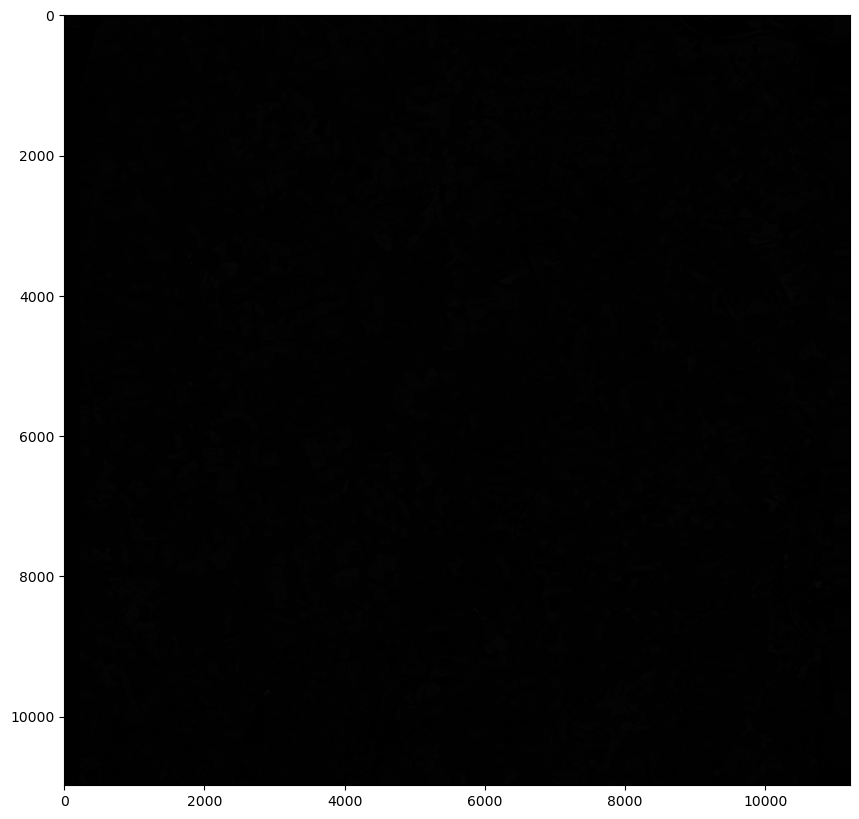

In [18]:
# Пример использования
image_path = r'D:\18\1_20\crop_3_3_0000.tif'
template_path = r'D:\18\layouts\layout_2021-08-16.tif'

# Сопоставление признаков
match_img, matches = match_features(image_path, template_path, method='SIFT')

# Отображение результатов
plt.figure(figsize=(20, 10))
plt.imshow(match_img, cmap='gray')
plt.show()

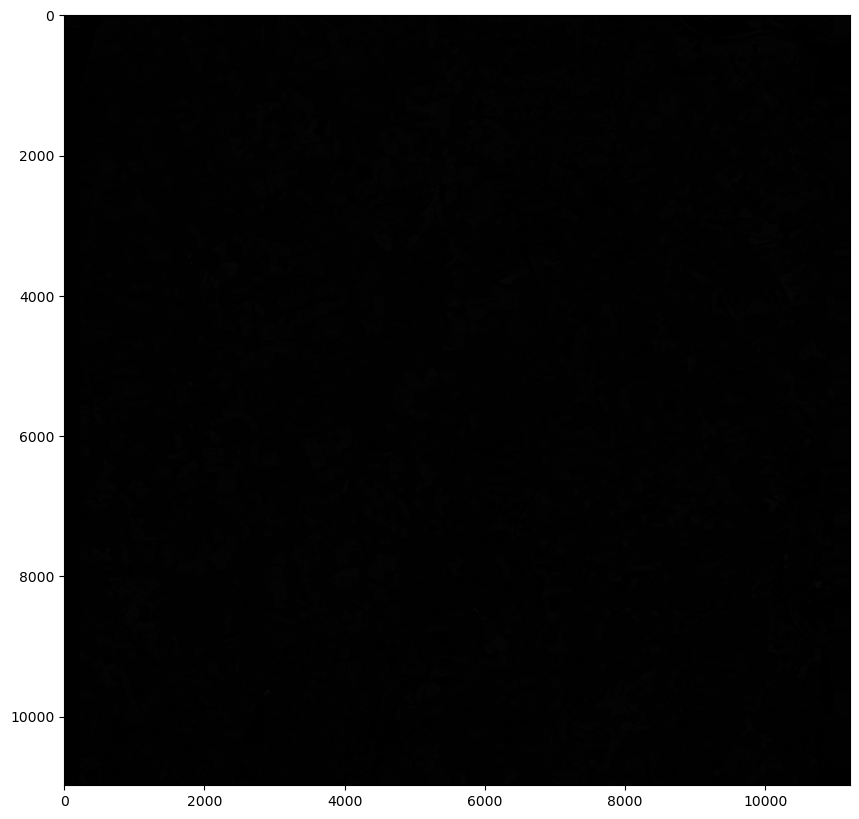

In [24]:
# Пример использования
image_path = r'D:\18\1_20\crop_3_3_0000.tif'
template_path = r'D:\18\layouts\layout_2021-08-16.tif'

# Сопоставление признаков
match_img, matches = match_features(image_path, template_path, method='ORB')

# Отображение результатов
plt.figure(figsize=(20, 10))
plt.imshow(match_img, cmap='gray')
plt.show()

Шаг 5: Определение верной подложки и привязка снимков  

Мы объединим определение подложки и сопоставление признаков в один процесс.

Импорт необходимых библиотек

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Функция для предсказания подложки

In [21]:
def predict_template(image_path, model, scaler, classifier):
    features = extract_features(image_path, model)
    features = scaler.transform([features])
    template_index = classifier.predict(features)[0]
    return template_index


Функция для извлечения признаков

In [22]:
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()


Функция для сопоставления признаков

In [23]:
def match_features(image_path, template_path, method='SIFT'):
    # Загрузка изображений
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    
    # Выбор метода для извлечения признаков
    if method == 'SIFT':
        detector = cv2.SIFT_create()
    elif method == 'ORB':
        detector = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Use 'SIFT' or 'ORB'.")

    # Извлечение ключевых точек и дескрипторов
    keypoints1, descriptors1 = detector.detectAndCompute(image, None)
    keypoints2, descriptors2 = detector.detectAndCompute(template, None)

    # Использование BFMatcher для сопоставления дескрипторов
    if method == 'SIFT':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    elif method == 'ORB':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Рисование первых 10 совпадений
    match_img = cv2.drawMatches(image, keypoints1, template, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return match_img, matches


Полный код ячейки

  Using cached opencv_contrib_python-4.10.0.82-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.82-cp37-abi3-win_amd64.whl (45.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\eddyd\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Точность модели: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


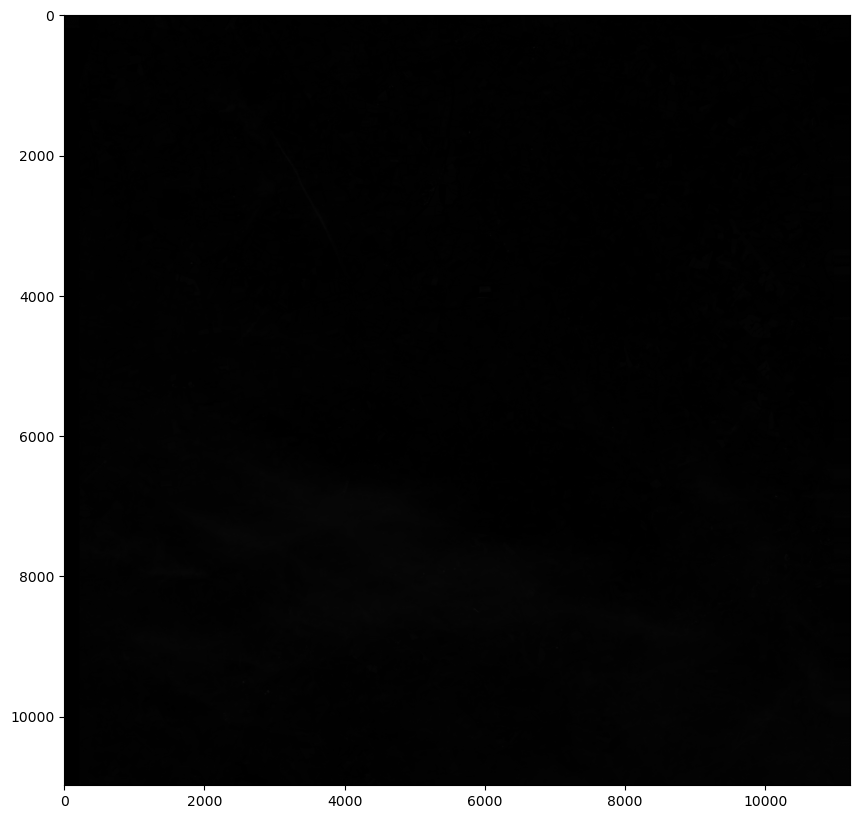

In [25]:
!pip install opencv-python-headless opencv-contrib-python scikit-learn tensorflow numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка предобученной модели VGG16
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Функция для извлечения признаков
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()

# Пути к изображениям
image_paths = [
    r'D:\18\1_20\crop_0_0_0000.tif',
    r'D:\18\1_20\crop_0_1_0000.tif',
    r'D:\18\1_20\crop_0_2_0000.tif',
    r'D:\18\1_20\crop_0_3_0000.tif',
    r'D:\18\1_20\crop_1_0_0000.tif',
    r'D:\18\1_20\crop_1_1_0000.tif',
    r'D:\18\1_20\crop_1_2_0000.tif',
    r'D:\18\1_20\crop_1_3_0000.tif',
    r'D:\18\1_20\crop_2_0_0000.tif',
    r'D:\18\1_20\crop_2_1_0000.tif',
    r'D:\18\1_20\crop_2_2_0000.tif',
    r'D:\18\1_20\crop_2_3_0000.tif',
    r'D:\18\1_20\crop_3_0_0000.tif',
    r'D:\18\1_20\crop_3_1_0000.tif',
    r'D:\18\1_20\crop_3_2_0000.tif',
    r'D:\18\1_20\crop_4_0_0000.tif',
    r'D:\18\1_20\crop_4_1_0000.tif',
    r'D:\18\1_20\crop_4_2_0000.tif',
    r'D:\18\1_20\crop_4_3_0000.tif'
]
    # Добавьте остальные пути


# Пути к подложкам
template_paths = [
    r'D:\18\layouts\layout_2021-06-15.tif',
    r'D:\18\layouts\layout_2021-08-16.tif',
    r'D:\18\layouts\layout_2021-10-10.tif',
    r'D:\18\layouts\layout_2022-03-17.tif'
]
    # Добавьте остальные пути

# Создание меток для обучения (например, 0 для template_1, 1 для template_2 и т.д.)
labels = [0, 1, 2, 3]  # Убедитесь, что количество меток соответствует количеству подложек

# Извлечение признаков для всех изображений
image_features = [extract_features(path, model) for path in image_paths]

# Извлечение признаков для всех подложек
template_features = [extract_features(path, model) for path in template_paths]

# Создание и обучение стандартного скейлера
scaler = StandardScaler()
image_features = scaler.fit_transform(image_features)
template_features = scaler.transform(template_features)

# Подготовка данных для обучения
X = template_features
y = labels

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Проверка точности модели на тестовой выборке
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy * 100:.2f}%')

# Функция для предсказания подложки
def predict_template(image_path, model, scaler, classifier):
    features = extract_features(image_path, model)
    features = scaler.transform([features])
    template_index = classifier.predict(features)[0]
    return template_index

# Функция для сопоставления признаков
def match_features(image_path, template_path, method='SIFT'):
    # Загрузка изображений
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    
    # Выбор метода для извлечения признаков
    if method == 'SIFT':
        detector = cv2.SIFT_create()
    elif method == 'ORB':
        detector = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Use 'SIFT' or 'ORB'.")

    # Извлечение ключевых точек и дескрипторов
    keypoints1, descriptors1 = detector.detectAndCompute(image, None)
    keypoints2, descriptors2 = detector.detectAndCompute(template, None)

    # Использование BFMatcher для сопоставления дескрипторов
    if method == 'SIFT':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    elif method == 'ORB':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Рисование первых 10 совпадений
    match_img = cv2.drawMatches(image, keypoints1, template, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return match_img, matches

# Пример использования
image_path = r'D:\18\1_20\crop_3_3_0000.tif'

# Предсказание подложки
predicted_template_index = predict_template(image_path, model, scaler, classifier)
template_path = template_paths[predicted_template_index]

# Сопоставление признаков
match_img, matches = match_features(image_path, template_path, method='ORB')

# Отображение результатов
plt.figure(figsize=(20, 10))
plt.imshow(match_img, cmap='gray')
plt.show()


Шаг 6: Восстановление битых пикселей

Функция для выявления битых пикселей

In [28]:
def detect_broken_pixels(image, threshold=50):
    """
    Обнаруживает битые пиксели на изображении.
    
    :param image: Входное изображение.
    :param threshold: Пороговое значение для выявления аномалий.
    :return: Маска битых пикселей.
    """
    # Вычисление медианного фильтра изображения
    median_filtered = median_filter(image, size=3)
    
    # Вычисление разницы между оригиналом и фильтрованным изображением
    diff = np.abs(image - median_filtered)
    
    # Создание маски битых пикселей на основе порога
    broken_pixels_mask = diff > threshold
    
    return broken_pixels_mask.astype(np.uint8)


Функция для восстановления битых пикселей

In [29]:
def inpaint_broken_pixels(image, mask):
    """
    Восстанавливает битые пиксели в изображении, используя заданную маску.
    
    :param image: Исходное изображение с битами пикселями.
    :param mask: Маска, где битые пиксели помечены как 1, а остальные как 0.
    :return: Изображение с восстановленными пикселями.
    """
    # Используем метод inpaint из OpenCV для восстановления
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return inpainted_image


Полный код ячейки для выявления и восстановления битых пикселей

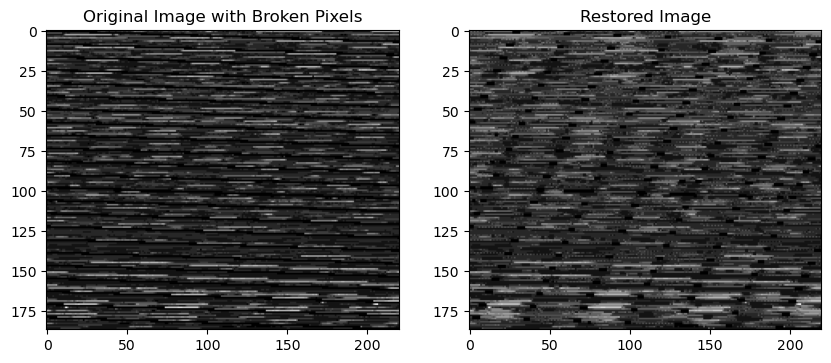

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Функция для выявления битых пикселей
def detect_broken_pixels(image, threshold=50):
    """
    Обнаруживает битые пиксели на изображении.
    
    :param image: Входное изображение.
    :param threshold: Пороговое значение для выявления аномалий.
    :return: Маска битых пикселей.
    """
    # Вычисление медианного фильтра изображения
    median_filtered = median_filter(image, size=3)
    
    # Вычисление разницы между оригиналом и фильтрованным изображением
    diff = np.abs(image - median_filtered)
    
    # Создание маски битых пикселей на основе порога
    broken_pixels_mask = diff > threshold
    
    return broken_pixels_mask.astype(np.uint8)

# Функция для восстановления битых пикселей
def inpaint_broken_pixels(image, mask):
    """
    Восстанавливает битые пиксели в изображении, используя заданную маску.
    
    :param image: Исходное изображение с битами пикселями.
    :param mask: Маска, где битые пиксели помечены как 1, а остальные как 0.
    :return: Изображение с восстановленными пикселями.
    """
    # Используем метод inpaint из OpenCV для восстановления
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return inpainted_image

# Пример использования
image_path =  r'D:\18\1_20\crop_3_3_0000.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Выявление битых пикселей
mask = detect_broken_pixels(image, threshold=50)

# Восстановление битых пикселей
restored_image = inpaint_broken_pixels(image, mask)

# Отображение результатов
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image with Broken Pixels')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Restored Image')
plt.imshow(restored_image, cmap='gray')
plt.show()


Полный скрипт для выполнения всех шагов

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Точность модели: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


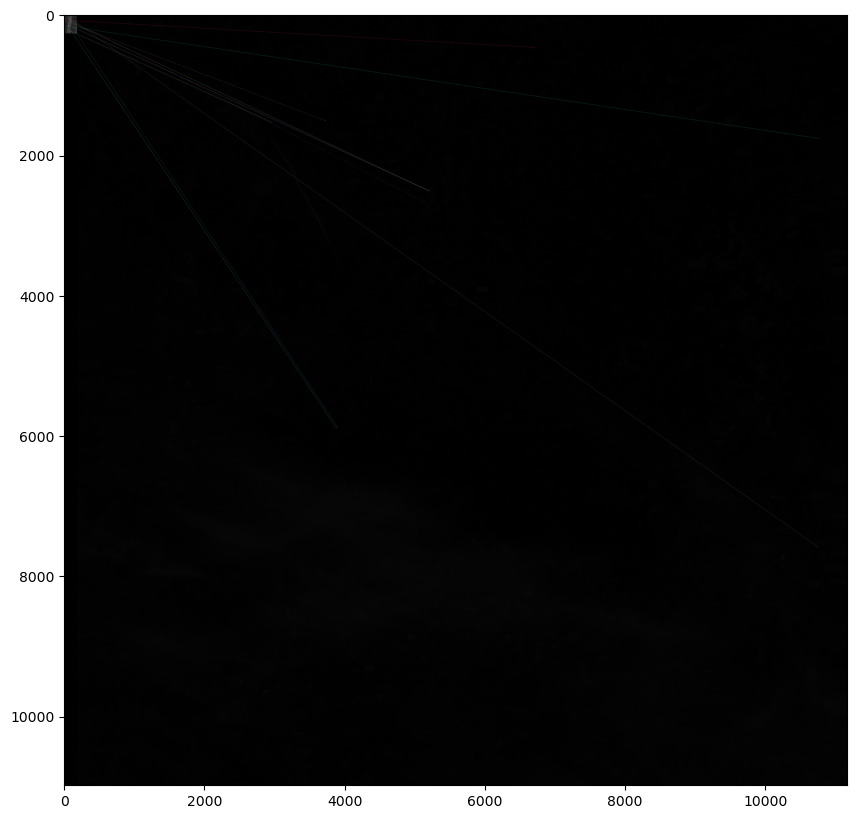

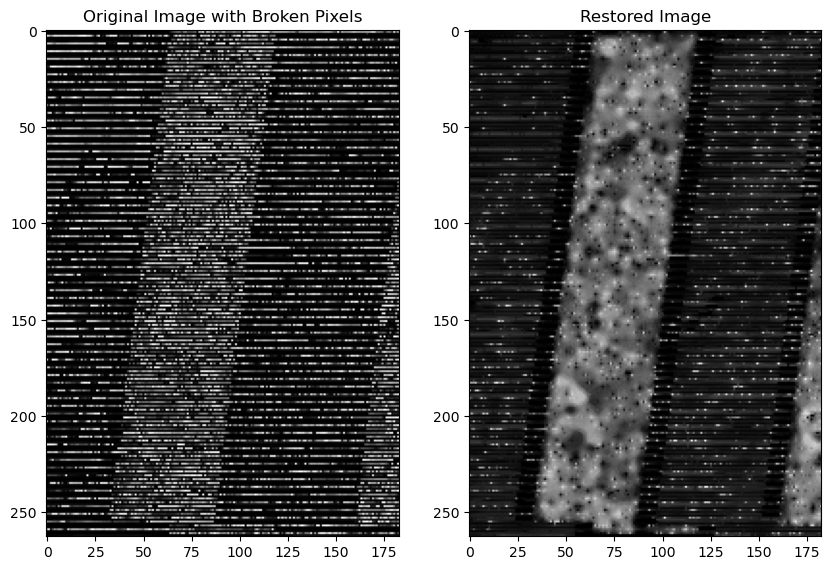

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка предобученной модели VGG16
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Функция для извлечения признаков
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()

# Пути к изображениям
image_paths = [
    r'D:\18\1_20\crop_0_0_0000.tif',
    r'D:\18\1_20\crop_0_1_0000.tif',
    r'D:\18\1_20\crop_0_2_0000.tif',
    r'D:\18\1_20\crop_0_3_0000.tif',
    r'D:\18\1_20\crop_1_0_0000.tif',
    r'D:\18\1_20\crop_1_1_0000.tif',
    r'D:\18\1_20\crop_1_2_0000.tif',
    r'D:\18\1_20\crop_1_3_0000.tif',
    r'D:\18\1_20\crop_2_0_0000.tif',
    r'D:\18\1_20\crop_2_1_0000.tif',
    r'D:\18\1_20\crop_2_2_0000.tif',
    r'D:\18\1_20\crop_2_3_0000.tif',
    r'D:\18\1_20\crop_3_0_0000.tif',
    r'D:\18\1_20\crop_3_1_0000.tif',
    r'D:\18\1_20\crop_3_2_0000.tif',
    r'D:\18\1_20\crop_4_0_0000.tif',
    r'D:\18\1_20\crop_4_1_0000.tif',
    r'D:\18\1_20\crop_4_2_0000.tif',
    r'D:\18\1_20\crop_4_3_0000.tif'
]
    # Добавьте остальные пути


# Пути к подложкам
template_paths = [
    r'D:\18\layouts\layout_2021-06-15.tif',
    r'D:\18\layouts\layout_2021-08-16.tif',
    r'D:\18\layouts\layout_2021-10-10.tif',
    r'D:\18\layouts\layout_2022-03-17.tif'
]
    # Добавьте остальные пути

# Создание меток для обучения (например, 0 для template_1, 1 для template_2 и т.д.)
labels = [0, 1, 2, 3]  # Убедитесь, что количество меток соответствует количеству подложек

# Извлечение признаков для всех изображений
image_features = [extract_features(path, model) for path in image_paths]

# Извлечение признаков для всех подложек
template_features = [extract_features(path, model) for path in template_paths]

# Создание и обучение стандартного скейлера
scaler = StandardScaler()
image_features = scaler.fit_transform(image_features)

template_features = scaler.transform(template_features)

# Подготовка данных для обучения
X = template_features
y = labels

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Проверка точности модели на тестовой выборке
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy * 100:.2f}%')

# Функция для предсказания подложки
def predict_template(image_path, model, scaler, classifier):
    features = extract_features(image_path, model)
    features = scaler.transform([features])
    template_index = classifier.predict(features)[0]
    return template_index

# Функция для сопоставления признаков
def match_features(image_path, template_path, method='SIFT'):
    # Загрузка изображений
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    
    # Выбор метода для извлечения признаков
    if method == 'SIFT':
        detector = cv2.SIFT_create()
    elif method == 'ORB':
        detector = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Use 'SIFT' or 'ORB'.")

    # Извлечение ключевых точек и дескрипторов
    keypoints1, descriptors1 = detector.detectAndCompute(image, None)
    keypoints2, descriptors2 = detector.detectAndCompute(template, None)

    # Использование BFMatcher для сопоставления дескрипторов
    if method == 'SIFT':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    elif method == 'ORB':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Рисование первых 10 совпадений
    match_img = cv2.drawMatches(image, keypoints1, template, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return match_img, matches

# Функция для выявления битых пикселей
def detect_broken_pixels(image, threshold=50):
    """
    Обнаруживает битые пиксели на изображении.
    
    :param image: Входное изображение.
    :param threshold: Пороговое значение для выявления аномалий.
    :return: Маска битых пикселей.
    """
    # Вычисление медианного фильтра изображения
    median_filtered = median_filter(image, size=3)
    
    # Вычисление разницы между оригиналом и фильтрованным изображением
    diff = np.abs(image - median_filtered)
    
    # Создание маски битых пикселей на основе порога
    broken_pixels_mask = diff > threshold
    
    return broken_pixels_mask.astype(np.uint8)

# Функция для восстановления битых пикселей
def inpaint_broken_pixels(image, mask):
    """
    Восстанавливает битые пиксели в изображении, используя заданную маску.
    
    :param image: Исходное изображение с битами пикселями.
    :param mask: Маска, где битые пиксели помечены как 1, а остальные как 0.
    :return: Изображение с восстановленными пикселями.
    """
    # Используем метод inpaint из OpenCV для восстановления
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return inpainted_image

# Пример использования
image_path = r'D:\18\1_20\crop_3_2_0000.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Предсказание подложки
predicted_template_index = predict_template(image_path, model, scaler, classifier)
template_path = template_paths[predicted_template_index]

# Сопоставление признаков
match_img, matches = match_features(image_path, template_path, method='ORB')

# Отображение результатов сопоставления
plt.figure(figsize=(20, 10))
plt.imshow(match_img, cmap='gray')
plt.show()

# Выявление битых пикселей
mask = detect_broken_pixels(image, threshold=50)

# Восстановление битых пикселей
restored_image = inpaint_broken_pixels(image, mask)

# Отображение результатов восстановления
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image with Broken Pixels')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Restored Image')
plt.imshow(restored_image, cmap='gray')
plt.show()


Шаги для определения координат углов фото

In [34]:

### Полный обновленный скрипт

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка предобученной модели VGG16
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Функция для извлечения признаков
def extract_features(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Изменение размера изображения до 224x224
    image = preprocess_input(image)  # Предобработка изображения для VGG16
    features = model.predict(np.expand_dims(image, axis=0))  # Извлечение признаков
    return features.flatten()

# Пути к изображениям
image_paths = [
    r'D:\18\1_20\crop_0_0_0000.tif',
    r'D:\18\1_20\crop_0_1_0000.tif',
    r'D:\18\1_20\crop_0_2_0000.tif',
    r'D:\18\1_20\crop_0_3_0000.tif',
    r'D:\18\1_20\crop_1_0_0000.tif',
    r'D:\18\1_20\crop_1_1_0000.tif',
    r'D:\18\1_20\crop_1_2_0000.tif',
    r'D:\18\1_20\crop_1_3_0000.tif',
    r'D:\18\1_20\crop_2_0_0000.tif',
    r'D:\18\1_20\crop_2_1_0000.tif',
    r'D:\18\1_20\crop_2_2_0000.tif',
    r'D:\18\1_20\crop_2_3_0000.tif',
    r'D:\18\1_20\crop_3_0_0000.tif',
    r'D:\18\1_20\crop_3_1_0000.tif',
    r'D:\18\1_20\crop_3_2_0000.tif',
    r'D:\18\1_20\crop_4_0_0000.tif',
    r'D:\18\1_20\crop_4_1_0000.tif',
    r'D:\18\1_20\crop_4_2_0000.tif',
    r'D:\18\1_20\crop_4_3_0000.tif'
]
    # Добавьте остальные пути


# Пути к подложкам
template_paths = [
    r'D:\18\layouts\layout_2021-06-15.tif',
    r'D:\18\layouts\layout_2021-08-16.tif',
    r'D:\18\layouts\layout_2021-10-10.tif',
    r'D:\18\layouts\layout_2022-03-17.tif'
]
    # Добавьте остальные пути

# Создание меток для обучения (например, 0 для template_1, 1 для template_2 и т.д.)
labels = [0, 1, 2, 3]  # Убедитесь, что количество меток соответствует количеству подложек

# Извлечение признаков для всех изображений
image_features = [extract_features(path, model) for path in image_paths]

# Извлечение признаков для всех подложек
template_features = [extract_features(path, model) for path in template_paths]

# Создание и обучение стандартного скейлера
scaler = StandardScaler()
image_features = scaler.fit_transform(image_features)
template_features = scaler.transform(template_features)

# Подготовка данных для обучения
X = template_features
y = labels

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Проверка точности модели на тестовой выборке
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy * 100:.2f}%')

# Функция для предсказания подложки
def predict_template(image_path, model, scaler, classifier):
    features = extract_features(image_path, model)
    features = scaler.transform([features])
    template_index = classifier.predict(features)[0]
    return template_index

# Функция для сопоставления признаков и вычисления гомографии
def find_homography_and_corners(image_path, template_path, method='SIFT'):
    # Загрузка изображений
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    
    # Выбор метода для извлечения признаков
    if method == 'SIFT':
        detector = cv2.SIFT_create()
    elif method == 'ORB':
        detector = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Use 'SIFT' or 'ORB'.")
    
    # Извлечение ключевых точек и дескрипторов
    keypoints1, descriptors1 = detector.detectAndCompute(image, None)
    keypoints2, descriptors2 = detector.detectAndCompute(template, None)
    
    # Использование BFMatcher для сопоставления дескрипторов
    if method == 'SIFT':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    elif method == 'ORB':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Получение точек сопоставления
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 2)
    
    # Проверка на минимальное количество совпадений
    if len(matches) < 4:
        raise ValueError("Недостаточно совпадений для вычисления гомографии.")
    
    # Вычисление гомографии
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    # Определение углов изображения
    h, w = image.shape
    corners = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    transformed_corners = cv2.perspectiveTransform(corners, H)
    
    return transformed_corners, matches, keypoints1, keypoints2, H

# Функция для отображения углов на изображении
def draw_corners(image_path, transformed_corners):
    image = cv2.imread(image_path)
    
    # Преобразование углов к целым числам
    transformed_corners = transformed_corners.astype(int)
    
    # Отображение углов
    for corner in transformed_corners:
        x, y = corner[0]
        cv2.circle(image, (x, y), 10, (0, 255, 0), -1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Corners of the Image')
    plt.show()

# Функция для отображения всех совпадений
def draw_matches(image_path, template_path, matches, keypoints1, keypoints2):
    image = cv2.imread(image_path)
    template = cv2.imread(template_path)
    
    # Отображение всех совпадений
    match_img = cv2.drawMatches(image, keypoints1, template, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(20, 10))
    plt.imshow(match_img)
    plt.title('Feature Matches')
    plt.show()

# Пример использования кода для определения углов изображения
image_path = r'D:\18\1_20\crop_3_3_0000.tif'
predicted_template_index = predict_template(image_path, model, scaler, classifier)
template_path = template_paths[predicted_template_index]

try:
    # Сопоставление признаков и вычисление гомографии
    transformed_corners, matches, keypoints1, keypoints2, H = find_homography_and_corners(image_path, template_path, method='ORB')
    draw_matches(image_path, template_path, matches, keypoints1, keypoints2)
    draw_corners(image_path, transformed_corners)
except ValueError as e:
    print(e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Точность модели: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Недостаточно совпадений для вычисления го

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


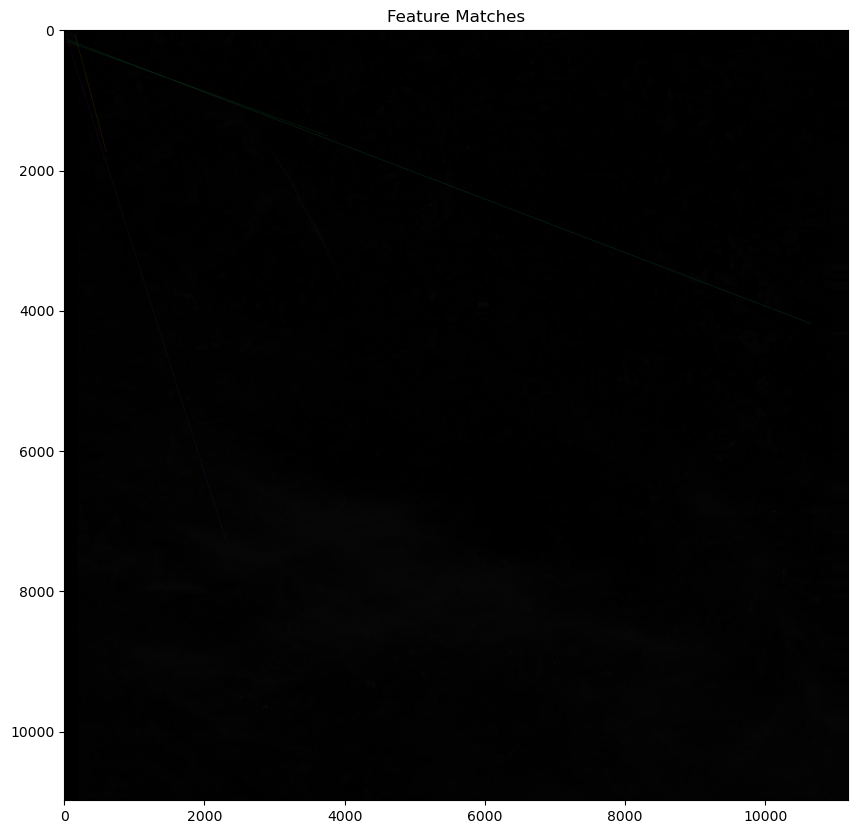

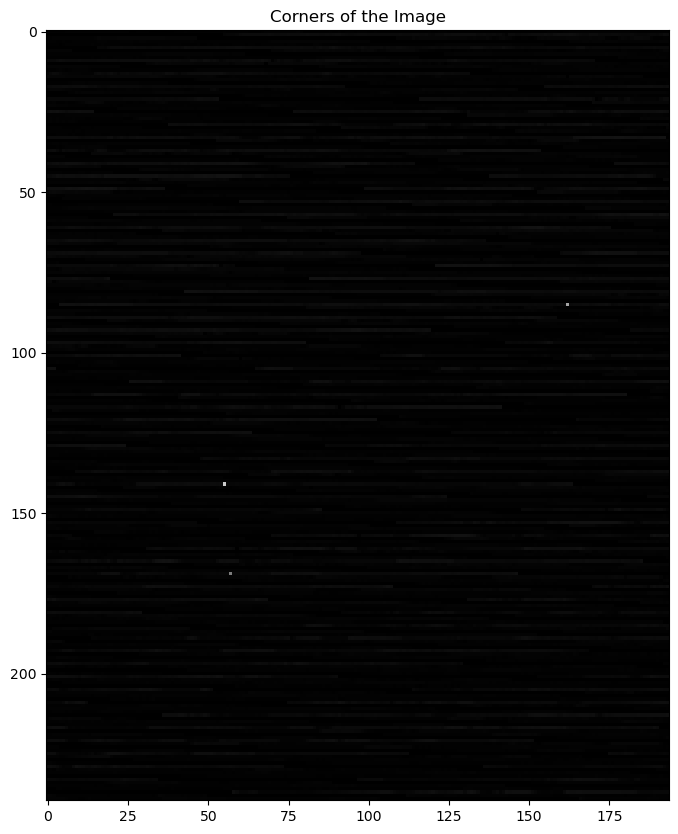

In [36]:
# Пример использования кода для определения углов изображения
image_path = r'D:\18\1_20\crop_1_0_0000.tif'
predicted_template_index = predict_template(image_path, model, scaler, classifier)
template_path = template_paths[predicted_template_index]

try:
    # Сопоставление признаков и вычисление гомографии
    transformed_corners, matches, keypoints1, keypoints2, H = find_homography_and_corners(image_path, template_path, method='ORB')
    draw_matches(image_path, template_path, matches, keypoints1, keypoints2)
    draw_corners(image_path, transformed_corners)
except ValueError as e:
    print(e)

Хорошо, давайте реализуем функции для сохранения результатов в формате GeoJSON и GeoTIFF.  
 Для этого нам понадобятся библиотеки geopandas и rasterio. Мы будем использовать координаты из каналов подложки для преобразования углов изображения в геокоординаты и создания соответствующих файлов.

In [38]:
import geopandas as gpd
from shapely.geometry import Polygon, mapping
import rasterio
from rasterio.transform import from_origin
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt


Функция для сохранения результатов в формате GeoJSON

In [50]:
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio

def save_to_geojson(transformed_corners, template_path, output_geojson_path):
    # Открытие файла подложки для получения геокоординат
    with rasterio.open(template_path) as src:
        # Получение аффинного преобразования и CRS
        transform = src.transform
        crs = src.crs

        # Преобразование углов в геокоординаты
        geo_corners = [transform * tuple(corner[0]) for corner in transformed_corners]

        # Создание полигона на основе углов
        polygon = Polygon(geo_corners)

        # Создание GeoDataFrame
        gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=crs)

        # Сохранение в формате GeoJSON
        gdf.to_file(output_geojson_path, driver='GeoJSON')

    print(f"Результаты успешно сохранены в {output_geojson_path}")


Функция для сохранения результатов в формате GeoTIFF

In [51]:
import cv2
import numpy as np
import rasterio
from rasterio.transform import from_origin

def save_to_geotiff(image_path, transformed_corners, template_path, output_geotiff_path):
    # Открытие файла подложки для получения геокоординат
    with rasterio.open(template_path) as src:
        # Получение геопривязки и CRS
        transform = src.transform
        crs = src.crs

        # Загрузка изображения
        image = cv2.imread(image_path)
        height, width, channels = image.shape

        # Создание новой трансформации для сохранения результата
        dst_transform = from_origin(transform.c, transform.f, transform.a, transform.e)

        # Сохранение изображения в GeoTIFF
        with rasterio.open(
            output_geotiff_path,
            'w',
            driver='GTiff',
            height=height,
            width=width,
            count=3,  # RGB
            dtype=image.dtype,
            crs=crs,
            transform=dst_transform
        ) as dst:
            dst.write(image[:, :, 0], 1)  # Канал R
            dst.write(image[:, :, 1], 2)  # Канал G
            dst.write(image[:, :, 2], 3)  # Канал B

    print(f"Результаты успешно сохранены в {output_geotiff_path}")


Пример использования функций

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


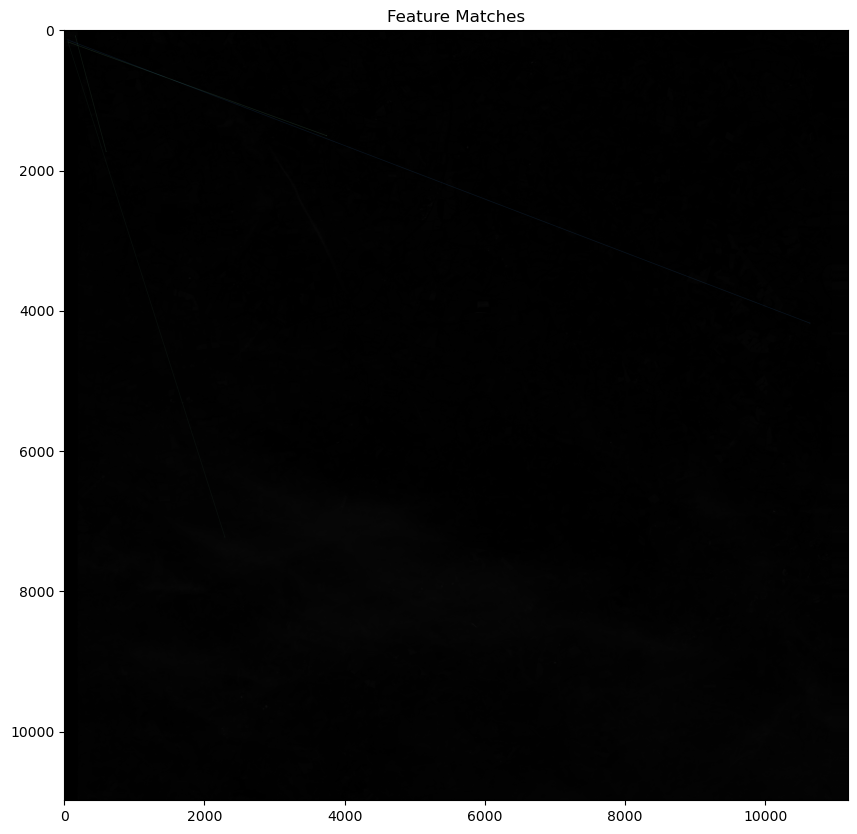

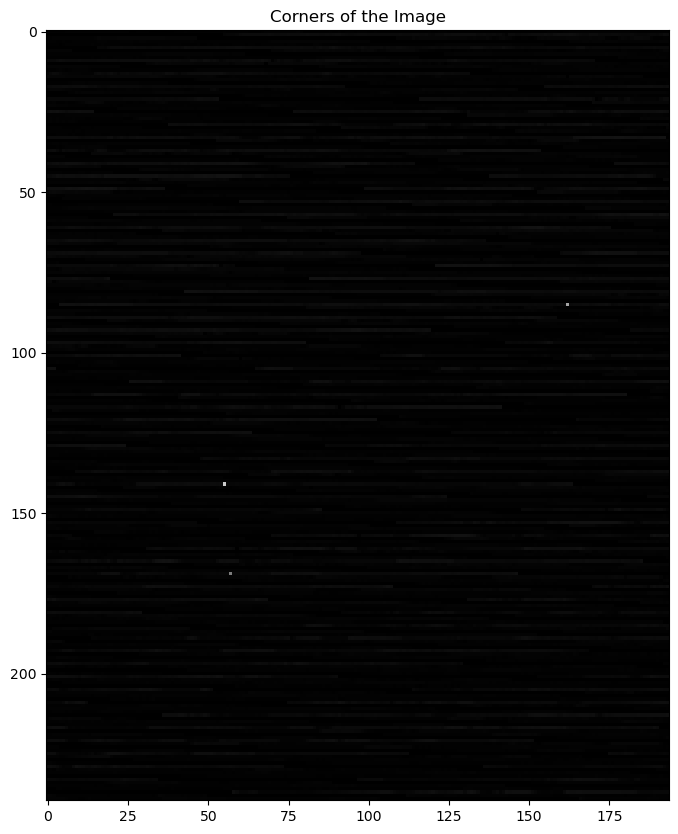

AttributeError: 'int' object has no attribute 'encode'

In [52]:
# Путь к файлам
image_path = r'D:\18\1_20\crop_1_0_0000.tif'
predicted_template_index = predict_template(image_path, model, scaler, classifier)
template_path = template_paths[predicted_template_index]

# Преобразование углов
try:
    transformed_corners, matches, keypoints1, keypoints2, H = find_homography_and_corners(image_path, template_path, method='ORB')
    draw_matches(image_path, template_path, matches, keypoints1, keypoints2)
    draw_corners(image_path, transformed_corners)
    
    # Сохранение в формате GeoJSON
    output_geojson_path = r'D:\18\results\res67ult.geojson'
    save_to_geojson(transformed_corners, template_path, output_geojson_path)

    # Сохранение в формате GeoTIFF
    output_geotiff_path = r'D:\18\results\re6s7ult.tif'
    save_to_geotiff(image_path, transformed_corners, template_path, output_geotiff_path)

except ValueError as e:
    print(e)
